In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Setup proejct
from Utils.ProjectPathsSetup import ProjectPathsSetup
from Environment.PathsParameters import *
from Environment.Parameters import *
ProjectPathsSetup().add_project_paths('./')

## PreTratamento nos dados

Merge e shuffle de todos os bancos de dados

In [3]:
#load Data

fake_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df = pd.read_csv(FAKE_NEWS_DATASET)

### Pré Avaliação Datasets

In [4]:
fake_news_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Text(0.5, 1.0, 'Fake news distribution per Subject')

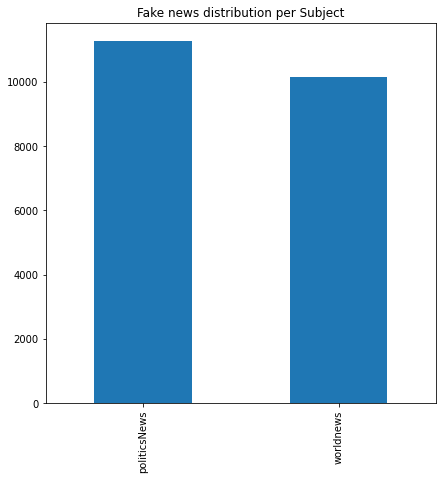

In [5]:
fig = plt.figure(figsize=(7,7))
fake_news_df['subject'].value_counts().plot(kind='bar')
plt.title('Fake news distribution per Subject')

#### True news

In [6]:
true_news_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Text(0.5, 1.0, 'True news distribution per Subject')

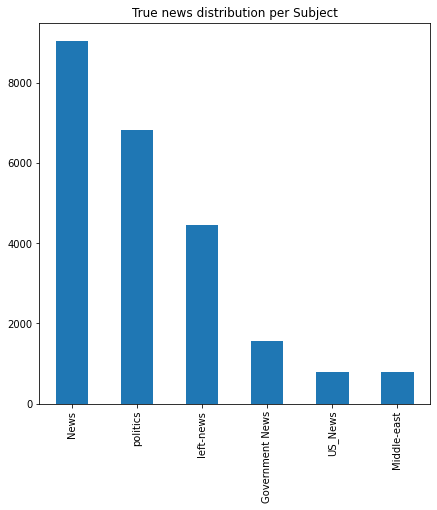

In [7]:
fig = plt.figure(figsize=(7,7))
true_news_df['subject'].value_counts().plot(kind='bar')
plt.title('True news distribution per Subject')

Comparando a distribuição de assunto entre as fakenews com as True news percebe-se que as fakenews são focadas em dois principais assutos equanto as notícias verdadeira são mais diversas. Será então que se queremos construir um bom detector de fake news não deveriamos então focar nesses dois assuntos? Ou então o assunto não seria relevante?

Vamos considerar só relevante o titulo e o texto relativo as noticias

#### Jutando os dados 

In [8]:
from Utils.Concatenator import Cocatenator

In [9]:
## merge
true_news_df['label'] = 0
true_news_df_rev= true_news_df[['title','text','label']].copy()

fake_news_df['label'] = 1
fake_news_df_rev= fake_news_df[['title','text','label']].copy()



news_df = Cocatenator().concatenate(true_news_df_rev, fake_news_df_rev)



## Data Preprocessing

O preprecessamento de dados basicamente foi realizado considerando 2 etapas. A etapa de processamento de texto, e a etapa de codificação do texto em uma forma de vetor numérico.
Para etapa de  processamento de texto fizemoso processamento de texto que usualmente se faz dados de texto: 

- Remoção de caracteres especiais
- Tokenização
- Eliminação das "stopwords"
- Steamming (normalização dos tokens)

Feito isso, utilizamos os tokens normalizados para realizar  as codificações. Basicamente foram dois tipos:

- embedding doc
- word2vector

E assim se fez respectivamente para os títutlos das notícias e os textos

Devido ao fato dos dados a serem processados requerem um tempo de processamento significativo, decidiu-se separar o preprocessamento através dos scripts `transform_text_to_embeddingDoc.py` e `transform_text_to_w2v.py` presentes no módulo *"PreProcessing". Os scripts fazem todo o préprocessamento necessário aos dados e os salvam em arquivos .csv, aos quais usaremos para dar processeguimento a construção de modelos.

O logs desses script podem ser vistos abaixo:

In [10]:
with open(LOGS_PATH + 'preprocessing_data_to_embedding_doc.txt', 'r') as f:
    logs_emb_doc = f.read()

print(logs_emb_doc)

2023-06-28 08:32:31.204720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-28 08:32:31.204855: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Inicializing Preprocessing setup...
Download 'punkt' NLTK package

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Download nltk 'stopwords' package

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
Setup  done!

*********************************************************************************

In [11]:
with open(LOGS_PATH + 'preprocessing_data_w2v.txt', 'r') as f:
    logs_w2v = f.read()

print(logs_w2v)

Inicializing Preprocessing setup...
Download 'punkt' NLTK package

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Download nltk 'stopwords' package

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
Setup  done!

****************************************************************************************************
Starting Preprocessing...

######################################################################################################################################################
Preprocessing texts data...

EspcialCharRemover started preprocessing !!
Removing Especial Characters...
Especial Characters removed !

WordT

In [41]:
#load preprocessed data

#embedding doc
text_embedding_doc = np.loadtxt(PREPROCESSED_DATA_PATH +'embedding_doc_text_arrays.csv', delimiter= ',')
title_embedding_doc = np.loadtxt(PREPROCESSED_DATA_PATH +'embedding_doc_title_arrays.csv', delimiter= ',')

#word2vec
text_w2v_encoded = np.loadtxt(PREPROCESSED_DATA_PATH +'w2v_text_arrays.csv', delimiter= ',')
title_w2v_encoded = np.loadtxt(PREPROCESSED_DATA_PATH +'w2v_title_arrays.csv', delimiter= ',')

## Modelagem

In [21]:
from DLArchitectures.SimpleDense import SimpleDense
from DLArchitectures.EmbeddingLSTM import EmbeddingLSTM
from Utils.GraphicPlotter import GraphicPlotter
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [22]:
# Set Seed to guarantee reprodubility
np.random.seed(SEED)
tf.random.set_seed(SEED)


# Instantiate Plotter

grapPlotter = GraphicPlotter()

In [23]:

news_class = news_df['label']

# split train/test text and title embedded doc
X_emb_doc_title_train, X_emb_doc_title_test, y_emb_doc_title_train , y_emb_doc_title_test = train_test_split(title_embedding_doc, news_class, train_size=0.8, random_state=SEED)
X_emb_doc_text_train, X_emb_doc_text_test, y_emb_doc_text_train , y_emb_doc_text_test = train_test_split(text_embedding_doc, news_class, train_size=0.8, random_state=SEED)

#split train/test text and title  word vectors

X_w2v_title_train, X_w2v_title_test, y_w2v_title_train , y_w2v_title_test = train_test_split(title_w2v_encoded, news_class, train_size=0.8, random_state=SEED)
X_w2v_text_train, X_w2v_text_test, y_w2v_text_train , y_w2v_text_test = train_test_split(text_w2v_encoded, news_class, train_size=0.8, random_state=SEED)


### Modeling for text

#### With embedding doc

##### EmbeddingLTSM

In [24]:
#  the model for the title
text_embedding_model_embdoc = EmbeddingLSTM(VO_SIZE_TEXT, EMBEDDING_TEXT_SIZE,100).get_model()
print(text_embedding_model_embdoc.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 100)        100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 180,501
Trainable params: 180,501
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history_title = text_embedding_model_embdoc.fit(X_emb_doc_text_train, y_emb_doc_text_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 31s 31ms/step - loss: 0.6925 - accuracy: 0.5209 - val_loss: 0.6922 - val_accuracy: 0.5164
Epoch 2/40
898/898 [==============================] - 29s 32ms/step - loss: 0.6908 - accuracy: 0.5279 - val_loss: 0.6931 - val_accuracy: 0.5209
Epoch 3/40
898/898 [==============================] - 28s 31ms/step - loss: 0.6863 - accuracy: 0.5482 - val_loss: 0.6967 - val_accuracy: 0.5035
Epoch 4/40
898/898 [==============================] - 26s 29ms/step - loss: 0.6811 - accuracy: 0.5611 - val_loss: 0.7028 - val_accuracy: 0.4992
Epoch 5/40
898/898 [==============================] - 28s 31ms/step - loss: 0.6754 - accuracy: 0.5715 - val_loss: 0.7079 - val_accuracy: 0.5011
Epoch 6/40
898/898 [==============================] - 28s 31ms/step - loss: 0.6676 - accuracy: 0.5834 - val_loss: 0.7215 - val_accuracy: 0.5102
Epoch 7/40
898/898 [==============================] - 31s 35ms/step - loss: 0.6555 - accuracy: 0.5976 - val_loss: 0.7204 - val_accuracy:

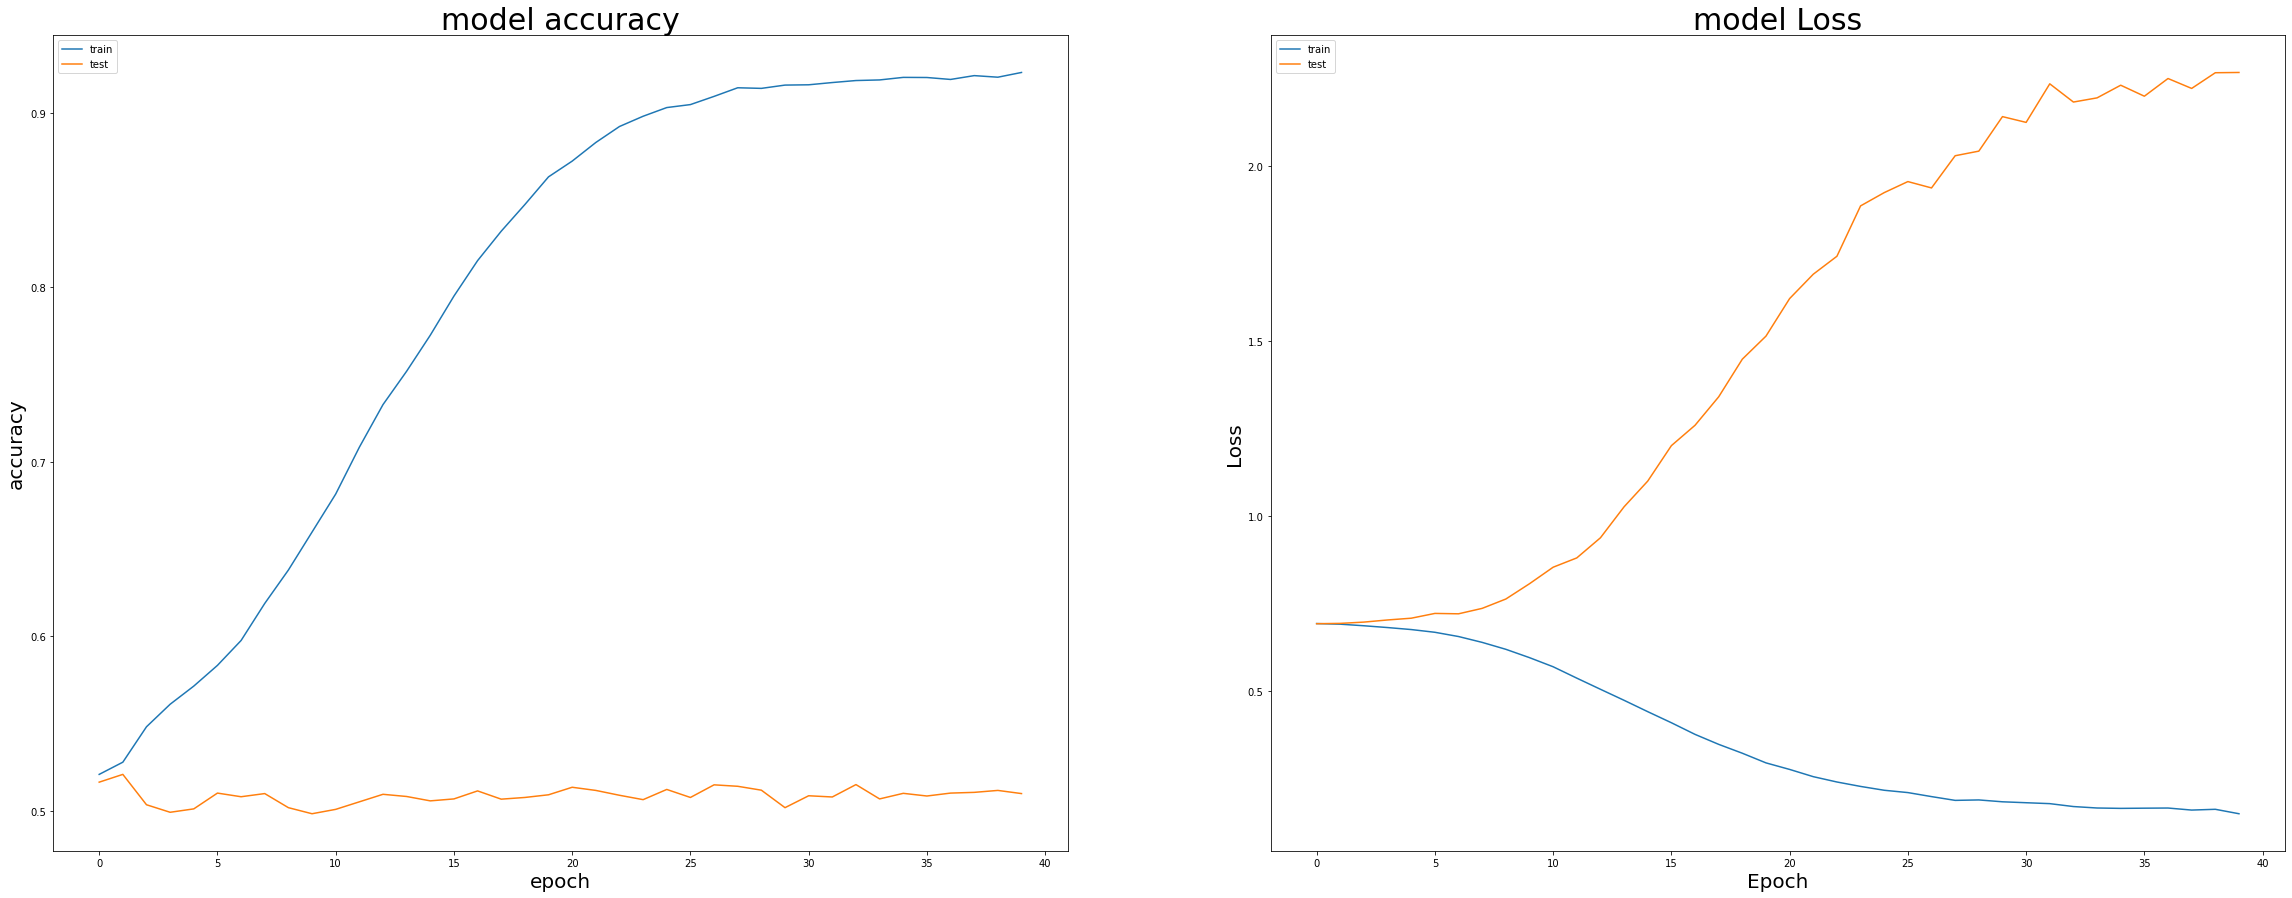

In [26]:
grapPlotter.plot_train_history(history_title)

#### with simpler model

In [31]:


text_embedding_model_embdoc_simple_dense = SimpleDense(20).get_model()

title_embedding_model_embdoc_simple_dense_hist = text_embedding_model_embdoc_simple_dense.fit(X_emb_doc_text_train, y_emb_doc_text_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 8s 5ms/step - loss: 11.0757 - accuracy: 0.5010 - val_loss: 3.9222 - val_accuracy: 0.4875
Epoch 2/40
898/898 [==============================] - 2s 3ms/step - loss: 5.7704 - accuracy: 0.5006 - val_loss: 2.4862 - val_accuracy: 0.5205
Epoch 3/40
898/898 [==============================] - 2s 2ms/step - loss: 5.2481 - accuracy: 0.5005 - val_loss: 6.6380 - val_accuracy: 0.5284
Epoch 4/40
898/898 [==============================] - 2s 2ms/step - loss: 4.9617 - accuracy: 0.5016 - val_loss: 4.4240 - val_accuracy: 0.4694
Epoch 5/40
898/898 [==============================] - 2s 3ms/step - loss: 4.6642 - accuracy: 0.5001 - val_loss: 5.6585 - val_accuracy: 0.5269
Epoch 6/40
898/898 [==============================] - 2s 2ms/step - loss: 4.4702 - accuracy: 0.4976 - val_loss: 2.8167 - val_accuracy: 0.4741
Epoch 7/40
898/898 [==============================] - 6s 7ms/step - loss: 4.2921 - accuracy: 0.4994 - val_loss: 3.2220 - val_accuracy: 0.5269
Epoch

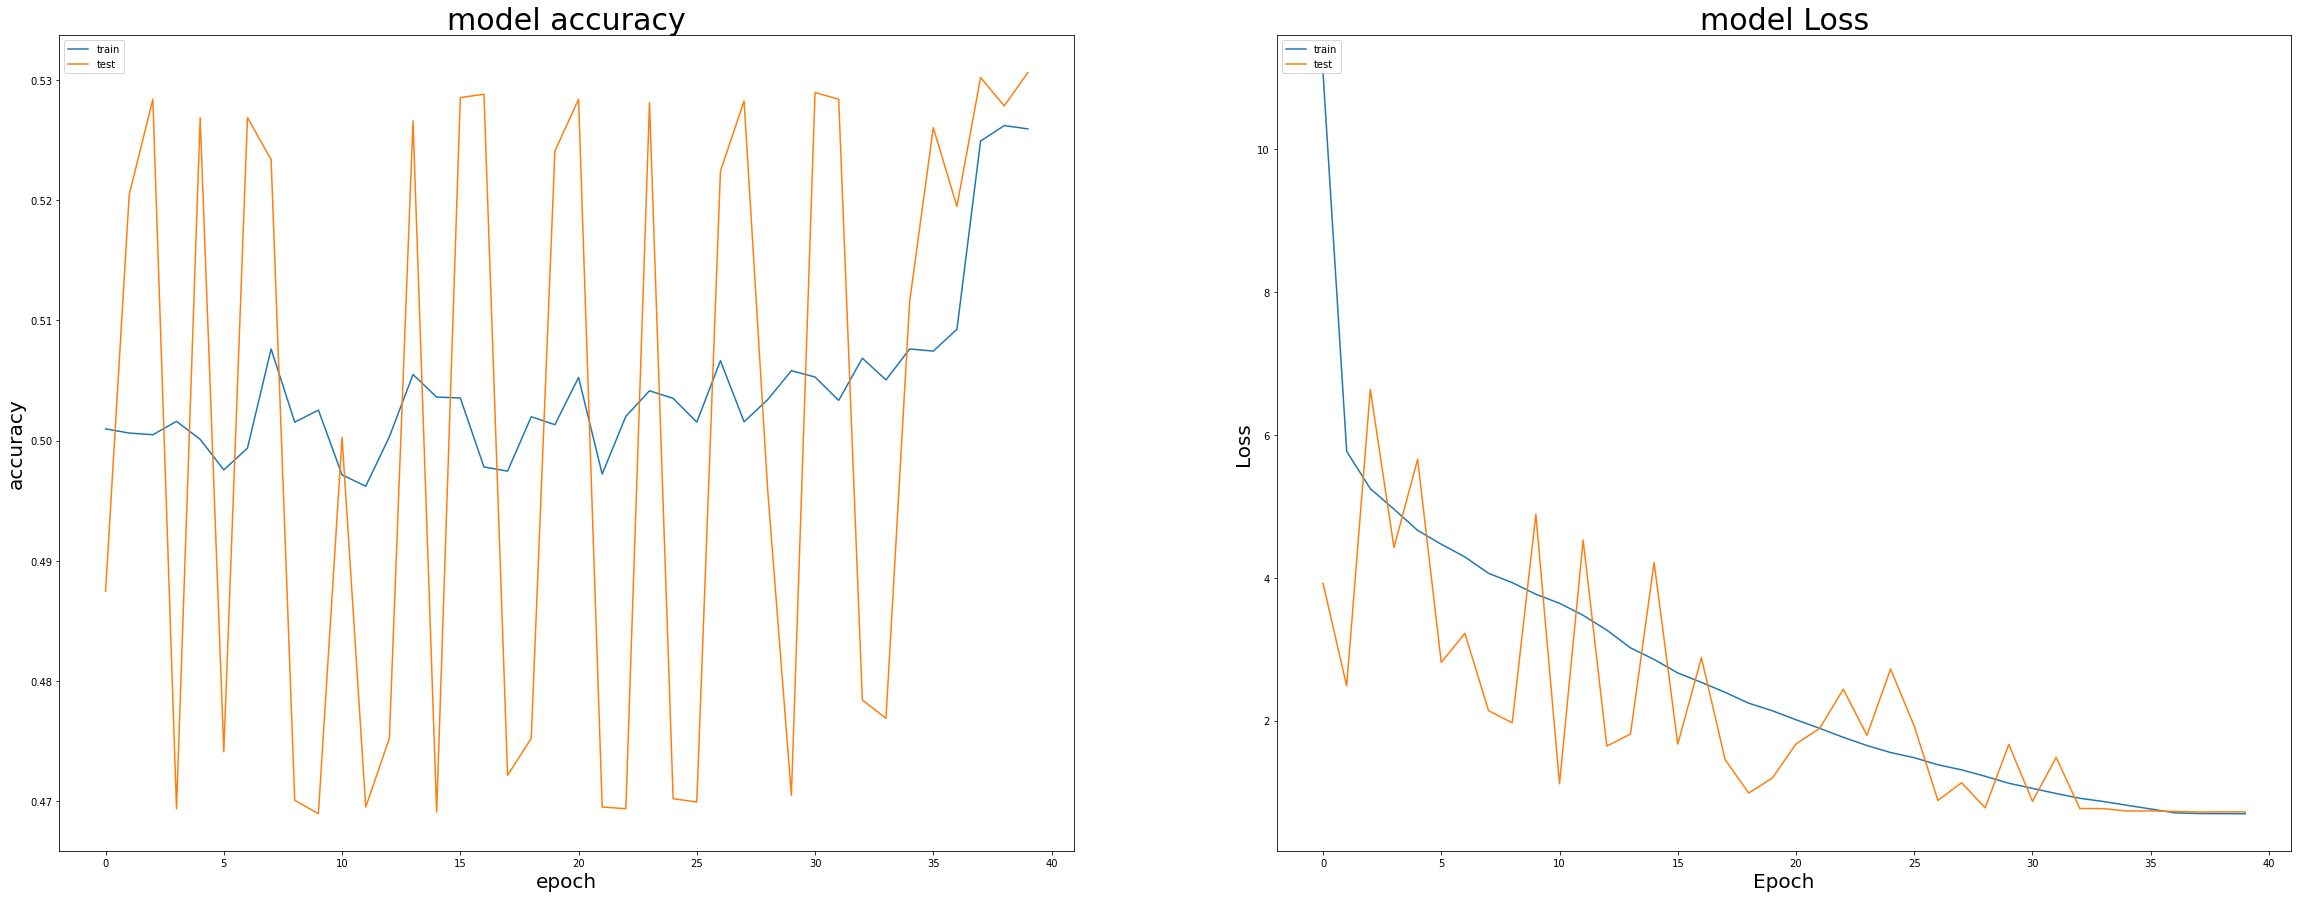

In [32]:
grapPlotter.plot_train_history(title_embedding_model_embdoc_simple_dense_hist)

### Vectorizer codification

Vocabulary Size: 38326


In [42]:
vocab_size = len(np.unique(text_w2v_encoded, axis=0))
vocab_size

38323

In [36]:
vocab_size = len(np.unique(text_w2v_encoded, axis=0))
model_text_w2v_emb_lstm =  EmbeddingLSTM(vocab_size, EMBEDDING__TITLE_SIZE, 100).get_model()
print(model_text_w2v_emb_lstm.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         1916300   
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,976,801
Trainable params: 1,976,801
Non-trainable params: 0
_________________________________________________________________
None


In [37]:

text_w2v_emb_lstm_history = model_text_w2v_emb_lstm.fit(X_w2v_title_train, y_w2v_title_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 127s 137ms/step - loss: 0.6924 - accuracy: 0.5199 - val_loss: 0.6919 - val_accuracy: 0.5302
Epoch 2/40
898/898 [==============================] - 137s 153ms/step - loss: 0.6924 - accuracy: 0.5210 - val_loss: 0.6914 - val_accuracy: 0.5302
Epoch 3/40
898/898 [==============================] - 111s 124ms/step - loss: 0.6923 - accuracy: 0.5212 - val_loss: 0.6919 - val_accuracy: 0.5302
Epoch 4/40
898/898 [==============================] - 142s 158ms/step - loss: 0.6924 - accuracy: 0.5213 - val_loss: 0.6917 - val_accuracy: 0.5302
Epoch 5/40
898/898 [==============================] - 153s 170ms/step - loss: 0.6923 - accuracy: 0.5214 - val_loss: 0.6919 - val_accuracy: 0.5302
Epoch 6/40
898/898 [==============================] - 148s 165ms/step - loss: 0.6923 - accuracy: 0.5204 - val_loss: 0.6913 - val_accuracy: 0.5302
Epoch 7/40
898/898 [==============================] - 133s 148ms/step - loss: 0.6922 - accuracy: 0.5219 - val_loss: 0.6915 -

Text(0.5, 0, 'Epoch')

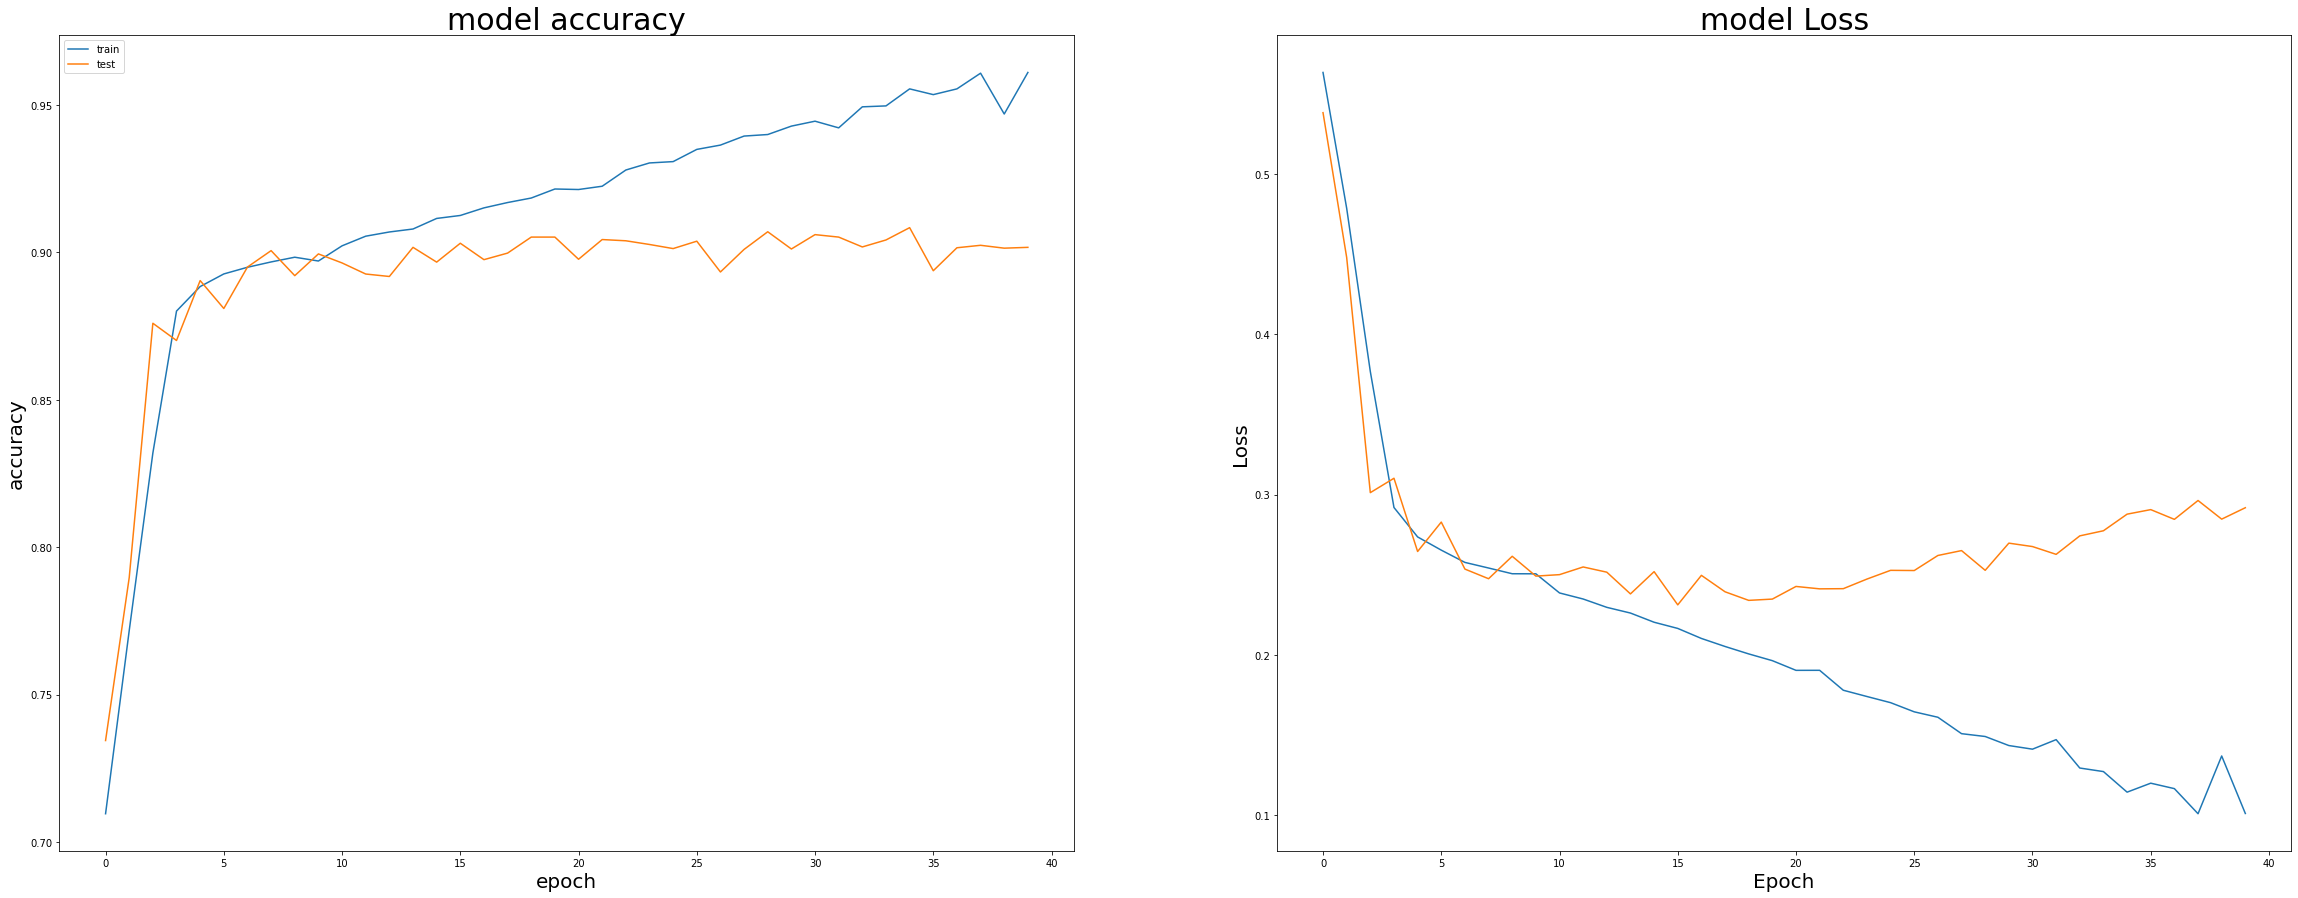

In [ ]:
grapPlotter.plot_train_history(text_w2v_emb_lstm_history)

### Testando um modelo mais simples

In [ ]:
model_w2v_simple_dense_text = SimpleDense(100).get_model()

model_w2v_simple_dense_text_history = model_w2v_simple_dense_text.fit(X_w2v_text_train, y_w2v_text_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 3s 3ms/step - loss: 804.0368 - accuracy: 0.5000 - val_loss: 1125.2377 - val_accuracy: 0.5146
Epoch 2/40
898/898 [==============================] - 2s 2ms/step - loss: 431.0491 - accuracy: 0.5048 - val_loss: 326.5111 - val_accuracy: 0.5146
Epoch 3/40
898/898 [==============================] - 2s 2ms/step - loss: 130.5308 - accuracy: 0.5057 - val_loss: 0.6928 - val_accuracy: 0.5146
Epoch 4/40
898/898 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5231 - val_loss: 0.6928 - val_accuracy: 0.5146
Epoch 5/40
898/898 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6928 - val_accuracy: 0.5146
Epoch 6/40
898/898 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6929 - val_accuracy: 0.5146
Epoch 7/40
898/898 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6929 - val_accuracy: 0.

Text(0.5, 0, 'Epoch')

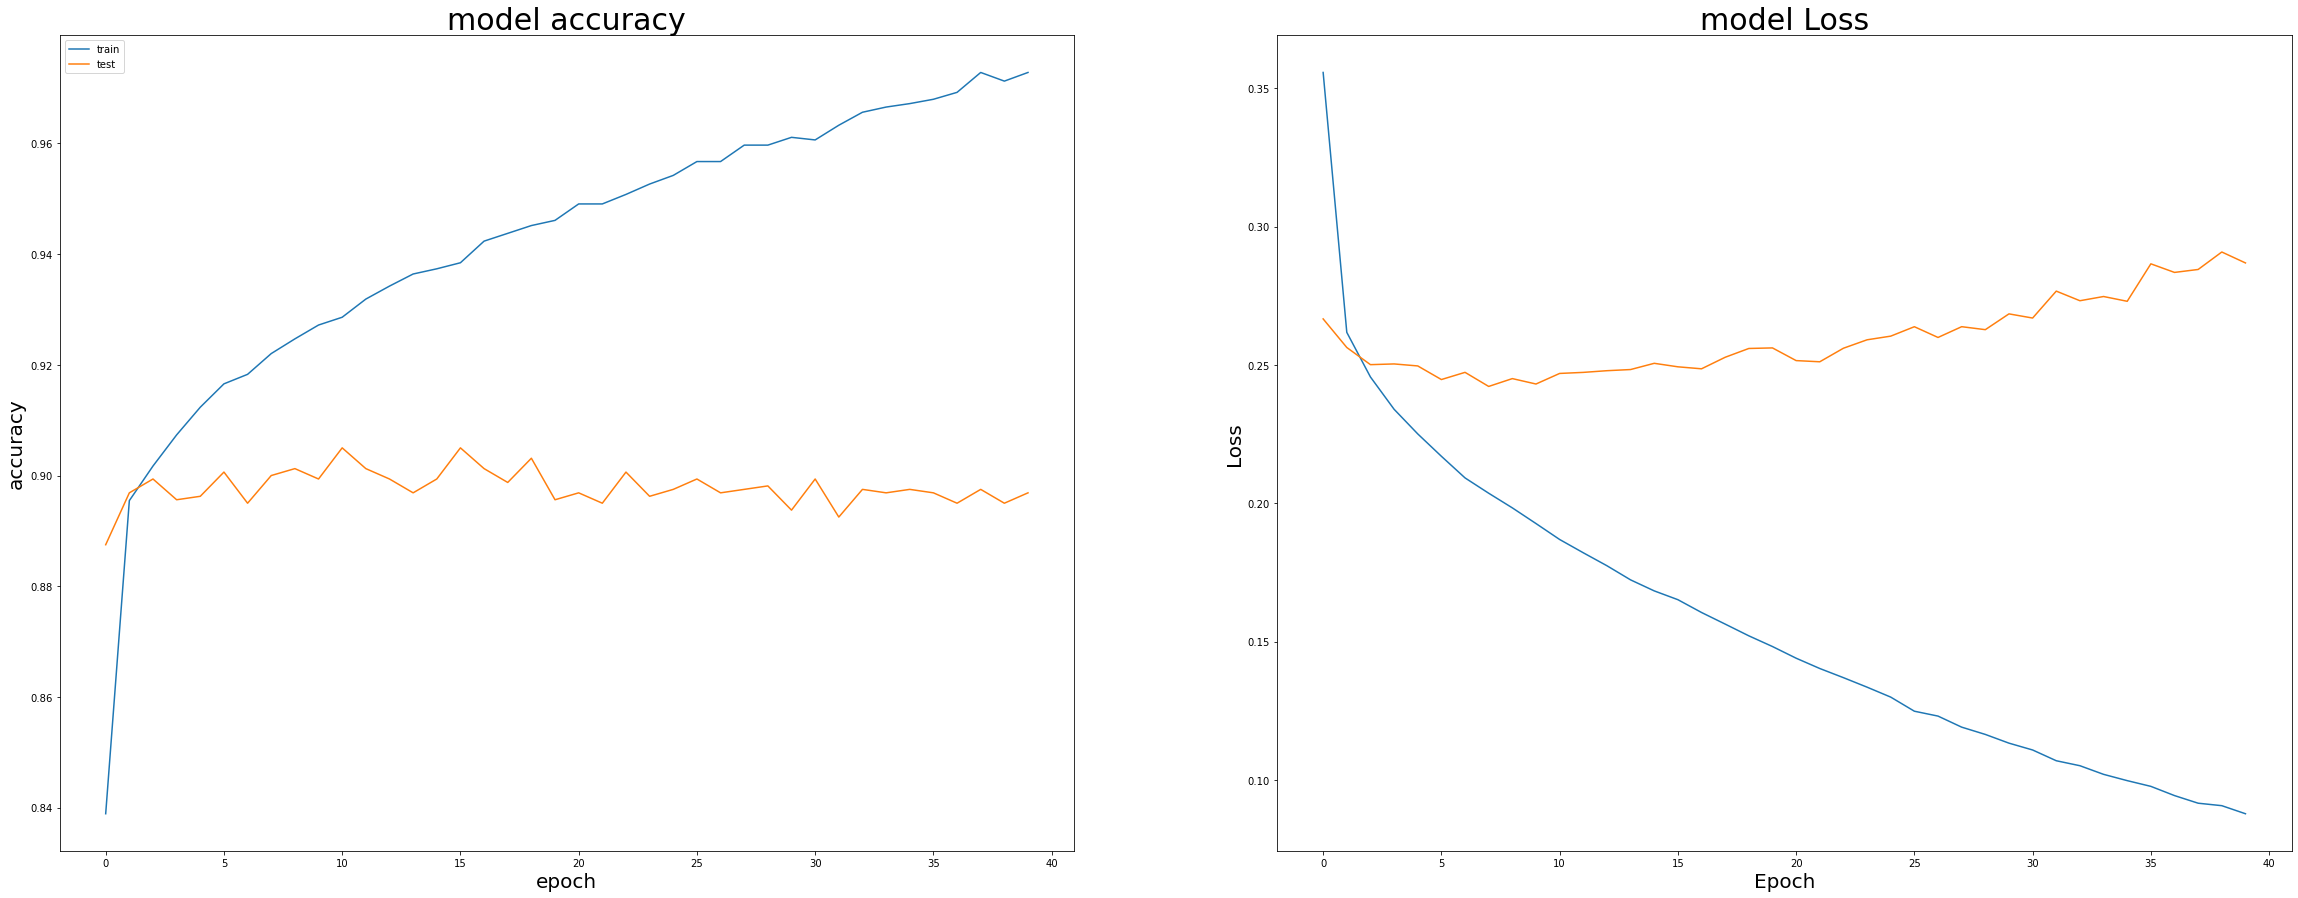

In [ ]:
grapPlotter.plot_train_history(model_w2v_simple_dense_text_history)

#### Modeling for Title

#### Embedding Doc Encode

##### The sofisticated model

In [ ]:
embedding_doc_model_title_lstm = EmbeddingLSTM(VO_SIZE_TITLE, EMBEDDING__TITLE_SIZE, 100).get_model()


print(embedding_doc_model_title_lstm.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         25000     
                                                                 
 lstm_4 (LSTM)               (None, 100)               60400     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 85,501
Trainable params: 85,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
embedding_doc_model_title_lstm_history_text = embedding_doc_model_title_lstm.fit(X_emb_doc_title_train, y_emb_doc_title_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)


Epoch 1/40
898/898 [==============================] - 34s 32ms/step - loss: 0.3194 - accuracy: 0.8587 - val_loss: 0.2993 - val_accuracy: 0.8630
Epoch 2/40
898/898 [==============================] - 29s 33ms/step - loss: 0.2583 - accuracy: 0.8852 - val_loss: 0.2528 - val_accuracy: 0.8878
Epoch 3/40
898/898 [==============================] - 29s 33ms/step - loss: 0.2406 - accuracy: 0.8942 - val_loss: 0.2388 - val_accuracy: 0.8932
Epoch 4/40
898/898 [==============================] - 28s 31ms/step - loss: 0.2277 - accuracy: 0.9009 - val_loss: 0.2426 - val_accuracy: 0.8955
Epoch 5/40
898/898 [==============================] - 27s 30ms/step - loss: 0.2189 - accuracy: 0.9053 - val_loss: 0.2457 - val_accuracy: 0.8917
Epoch 6/40
898/898 [==============================] - 20s 22ms/step - loss: 0.2096 - accuracy: 0.9090 - val_loss: 0.2487 - val_accuracy: 0.8949
Epoch 7/40
898/898 [==============================] - 20s 22ms/step - loss: 0.2012 - accuracy: 0.9129 - val_loss: 0.2499 - val_accuracy:

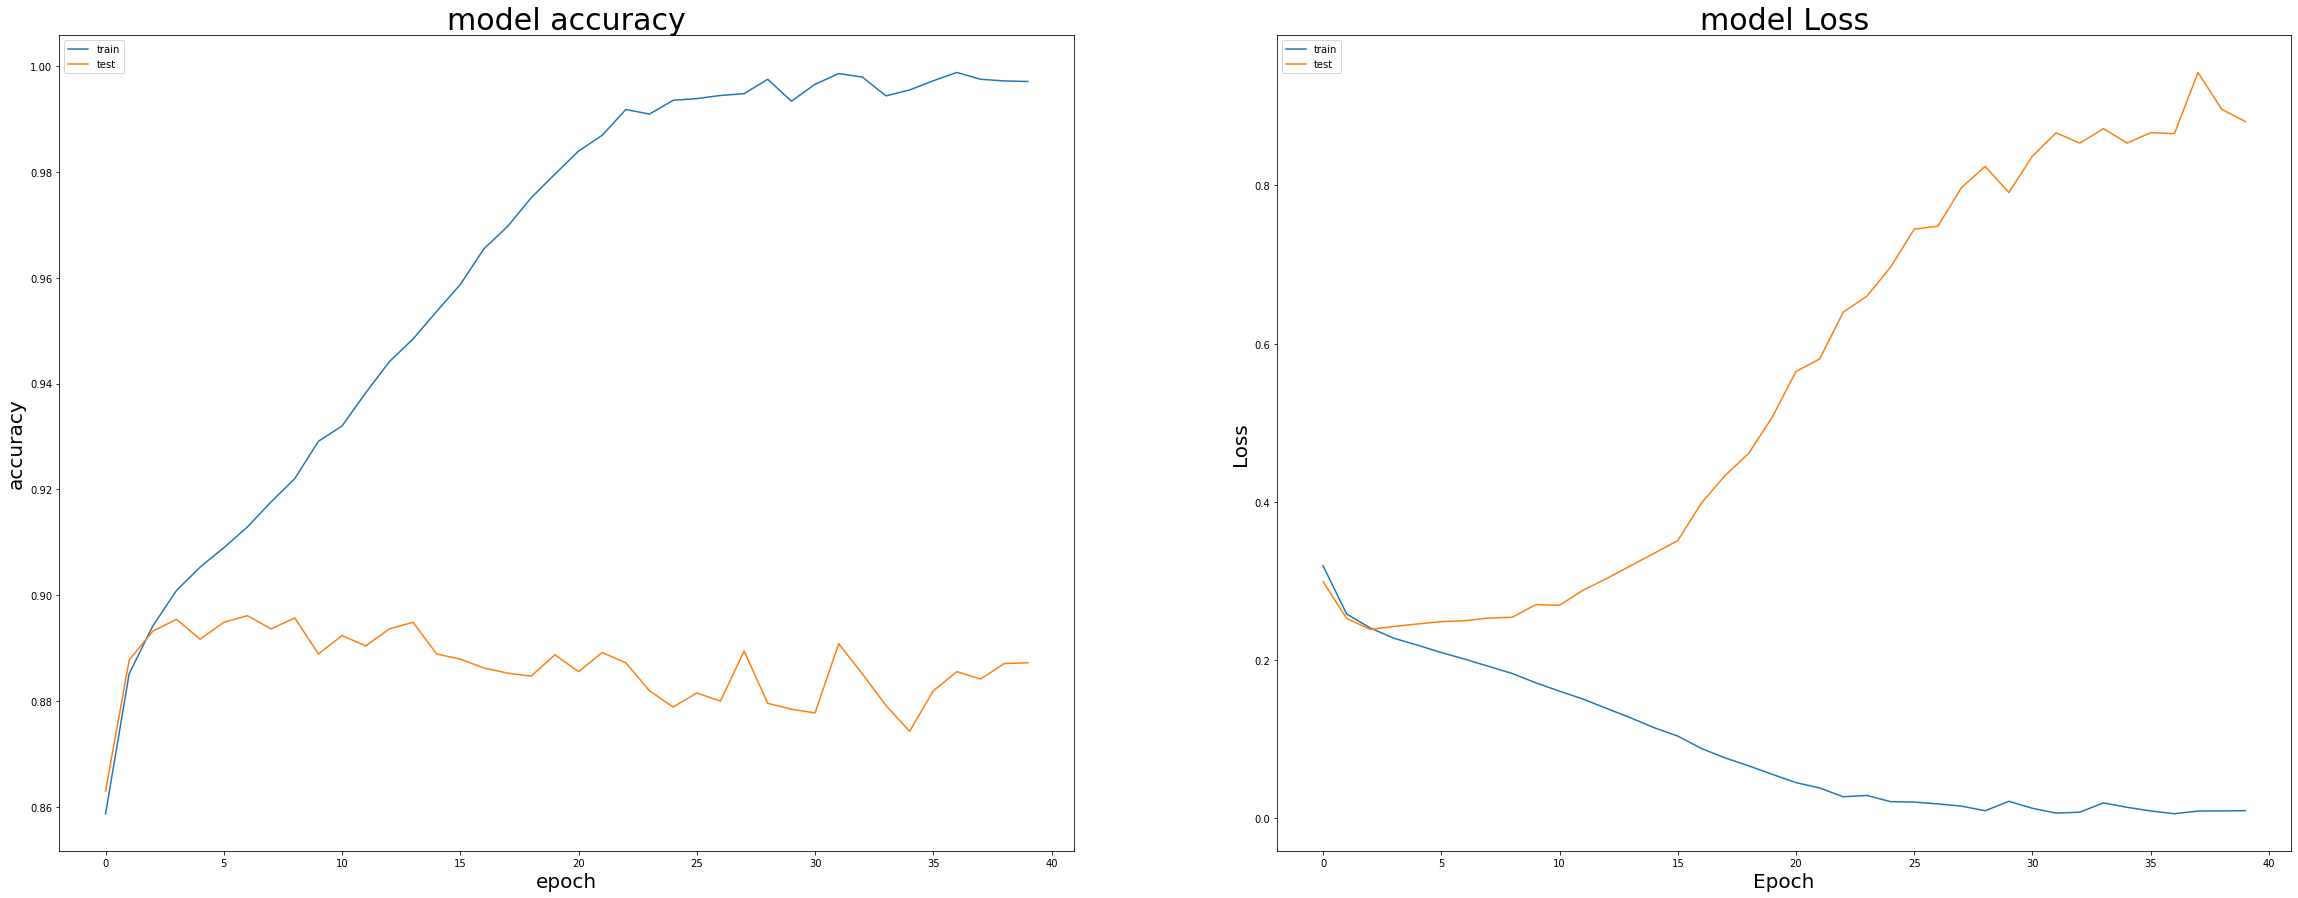

In [ ]:
grapPlotter.plot_train_history(embedding_doc_model_title_lstm_history_text)

#### The Simpler model

In [ ]:
text_sent_length = 20
embedding_title_simple_dense_model = SimpleDense(text_sent_length).get_model()

embedding_title_simple_dense_model_history = embedding_title_simple_dense_model.fit(X_emb_doc_title_train, y_emb_doc_title_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 3s 3ms/step - loss: 5.1180 - accuracy: 0.6298 - val_loss: 3.2331 - val_accuracy: 0.6304
Epoch 2/40
898/898 [==============================] - 2s 3ms/step - loss: 1.7400 - accuracy: 0.6448 - val_loss: 1.1792 - val_accuracy: 0.6826
Epoch 3/40
898/898 [==============================] - 2s 2ms/step - loss: 1.5515 - accuracy: 0.6463 - val_loss: 1.3547 - val_accuracy: 0.5916
Epoch 4/40
898/898 [==============================] - 3s 3ms/step - loss: 1.4487 - accuracy: 0.6496 - val_loss: 1.2491 - val_accuracy: 0.6904
Epoch 5/40
898/898 [==============================] - 2s 2ms/step - loss: 1.3850 - accuracy: 0.6466 - val_loss: 1.0200 - val_accuracy: 0.6233
Epoch 6/40
898/898 [==============================] - 2s 3ms/step - loss: 1.3238 - accuracy: 0.6493 - val_loss: 1.3691 - val_accuracy: 0.6791
Epoch 7/40
898/898 [==============================] - 2s 2ms/step - loss: 1.2553 - accuracy: 0.6553 - val_loss: 0.7897 - val_accuracy: 0.7151
Epoch 

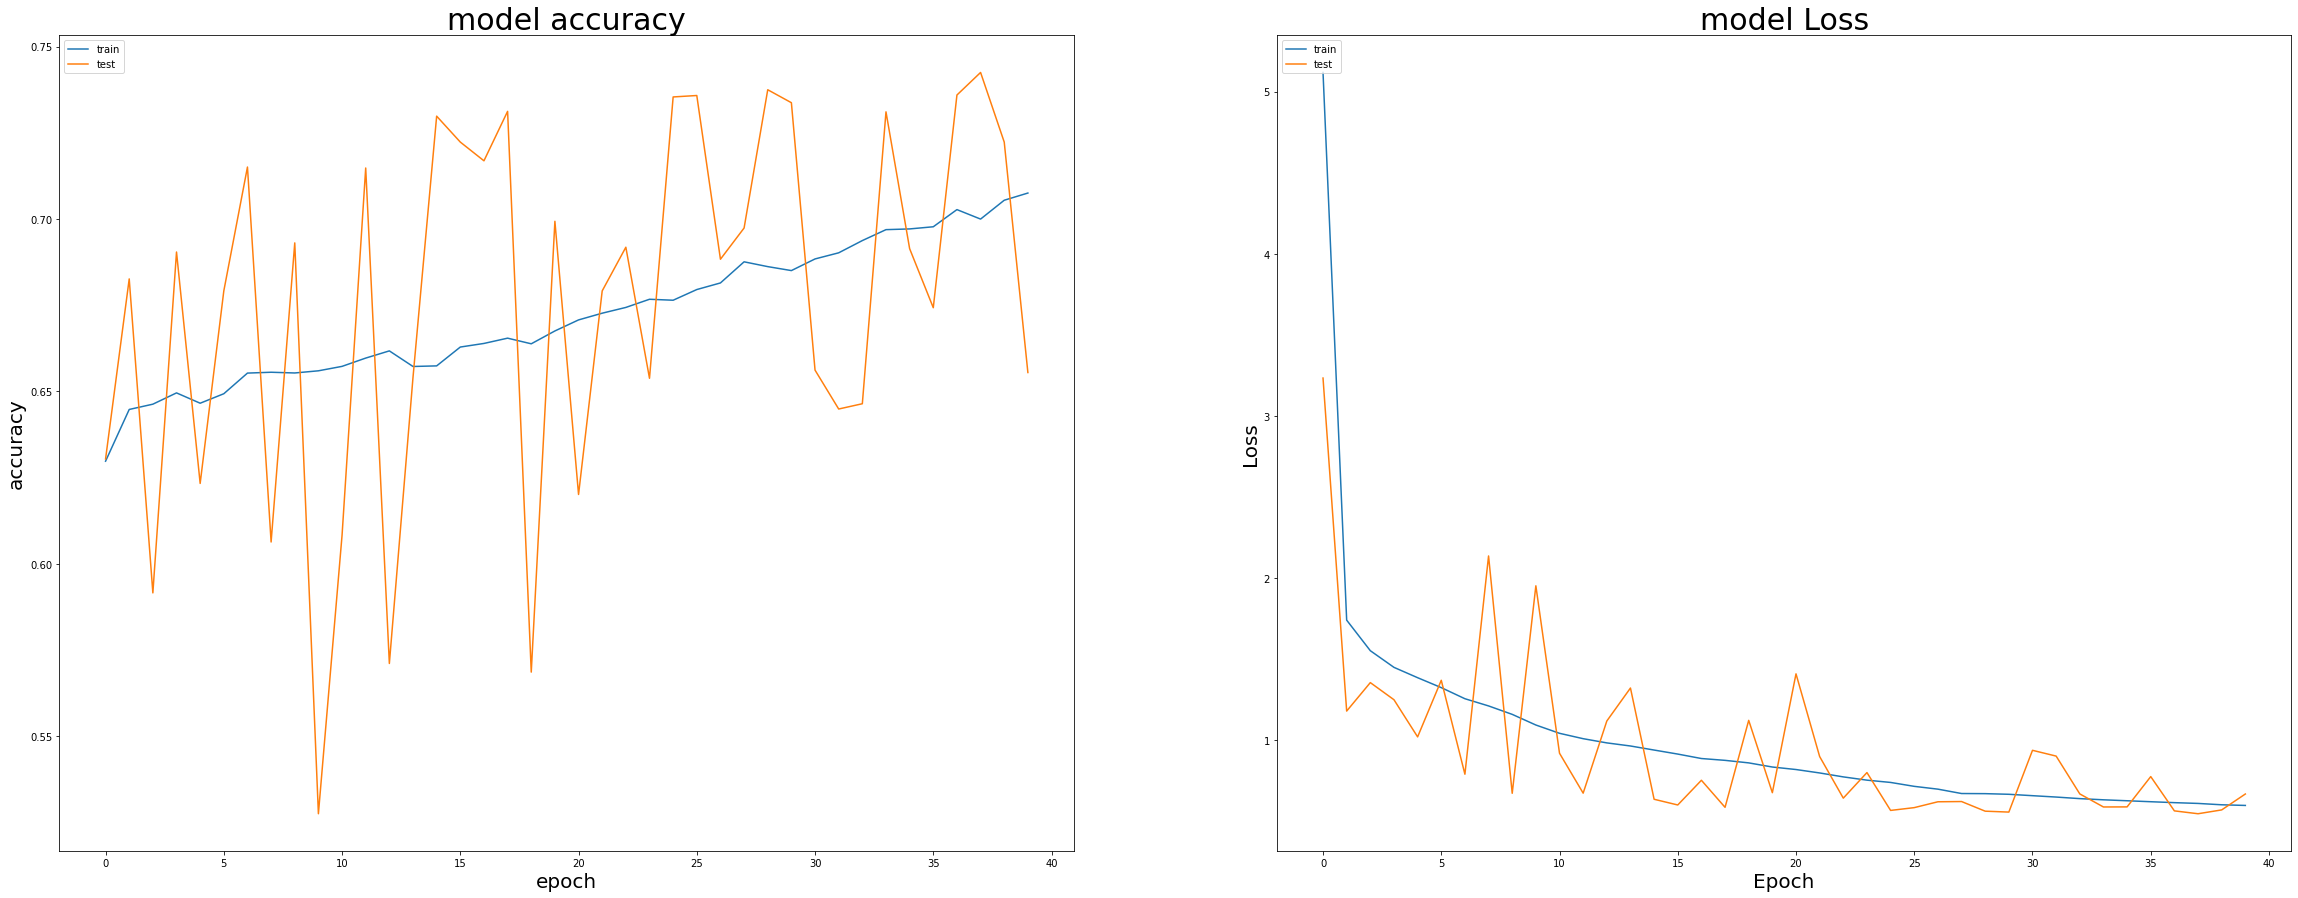

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(embedding_title_simple_dense_model_history.history['accuracy'])
axs[0].plot(embedding_title_simple_dense_model_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(embedding_title_simple_dense_model_history.history['loss'])
axs[1].plot(embedding_title_simple_dense_model_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

grapPlotter.plot_train_history(embedding_title_simple_dense_model_history)

#### Vectorization Encode

##### Sofisticated Model

In [ ]:
title_vocab_size = titleW2vEncoder.get_vocab_size()
w2v_embedding_lstm_title_model =  EmbeddingLSTM(title_vocab_size, EMBEDDING__TITLE_SIZE, 100).get_model()

print(w2v_embedding_lstm_title_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         245050    
                                                                 
 lstm_6 (LSTM)               (None, 100)               60400     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 305,551
Trainable params: 305,551
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
w2v_embedding_lstm_title_model_history = w2v_embedding_lstm_title_model.fit(X_w2v_title_train, y_w2v_title_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 59s 61ms/step - loss: 0.5360 - accuracy: 0.7308 - val_loss: 0.4834 - val_accuracy: 0.7700
Epoch 2/40
898/898 [==============================] - 50s 56ms/step - loss: 0.4404 - accuracy: 0.7995 - val_loss: 0.3616 - val_accuracy: 0.8487
Epoch 3/40
898/898 [==============================] - 56s 63ms/step - loss: 0.3261 - accuracy: 0.8619 - val_loss: 0.2766 - val_accuracy: 0.8891
Epoch 4/40
898/898 [==============================] - 59s 66ms/step - loss: 0.2774 - accuracy: 0.8860 - val_loss: 0.2640 - val_accuracy: 0.8948
Epoch 5/40
898/898 [==============================] - 62s 69ms/step - loss: 0.2652 - accuracy: 0.8941 - val_loss: 0.2488 - val_accuracy: 0.9003
Epoch 6/40
898/898 [==============================] - 63s 70ms/step - loss: 0.2532 - accuracy: 0.8970 - val_loss: 0.2445 - val_accuracy: 0.9001
Epoch 7/40
898/898 [==============================] - 60s 67ms/step - loss: 0.2460 - accuracy: 0.9007 - val_loss: 0.2461 - val_accuracy:

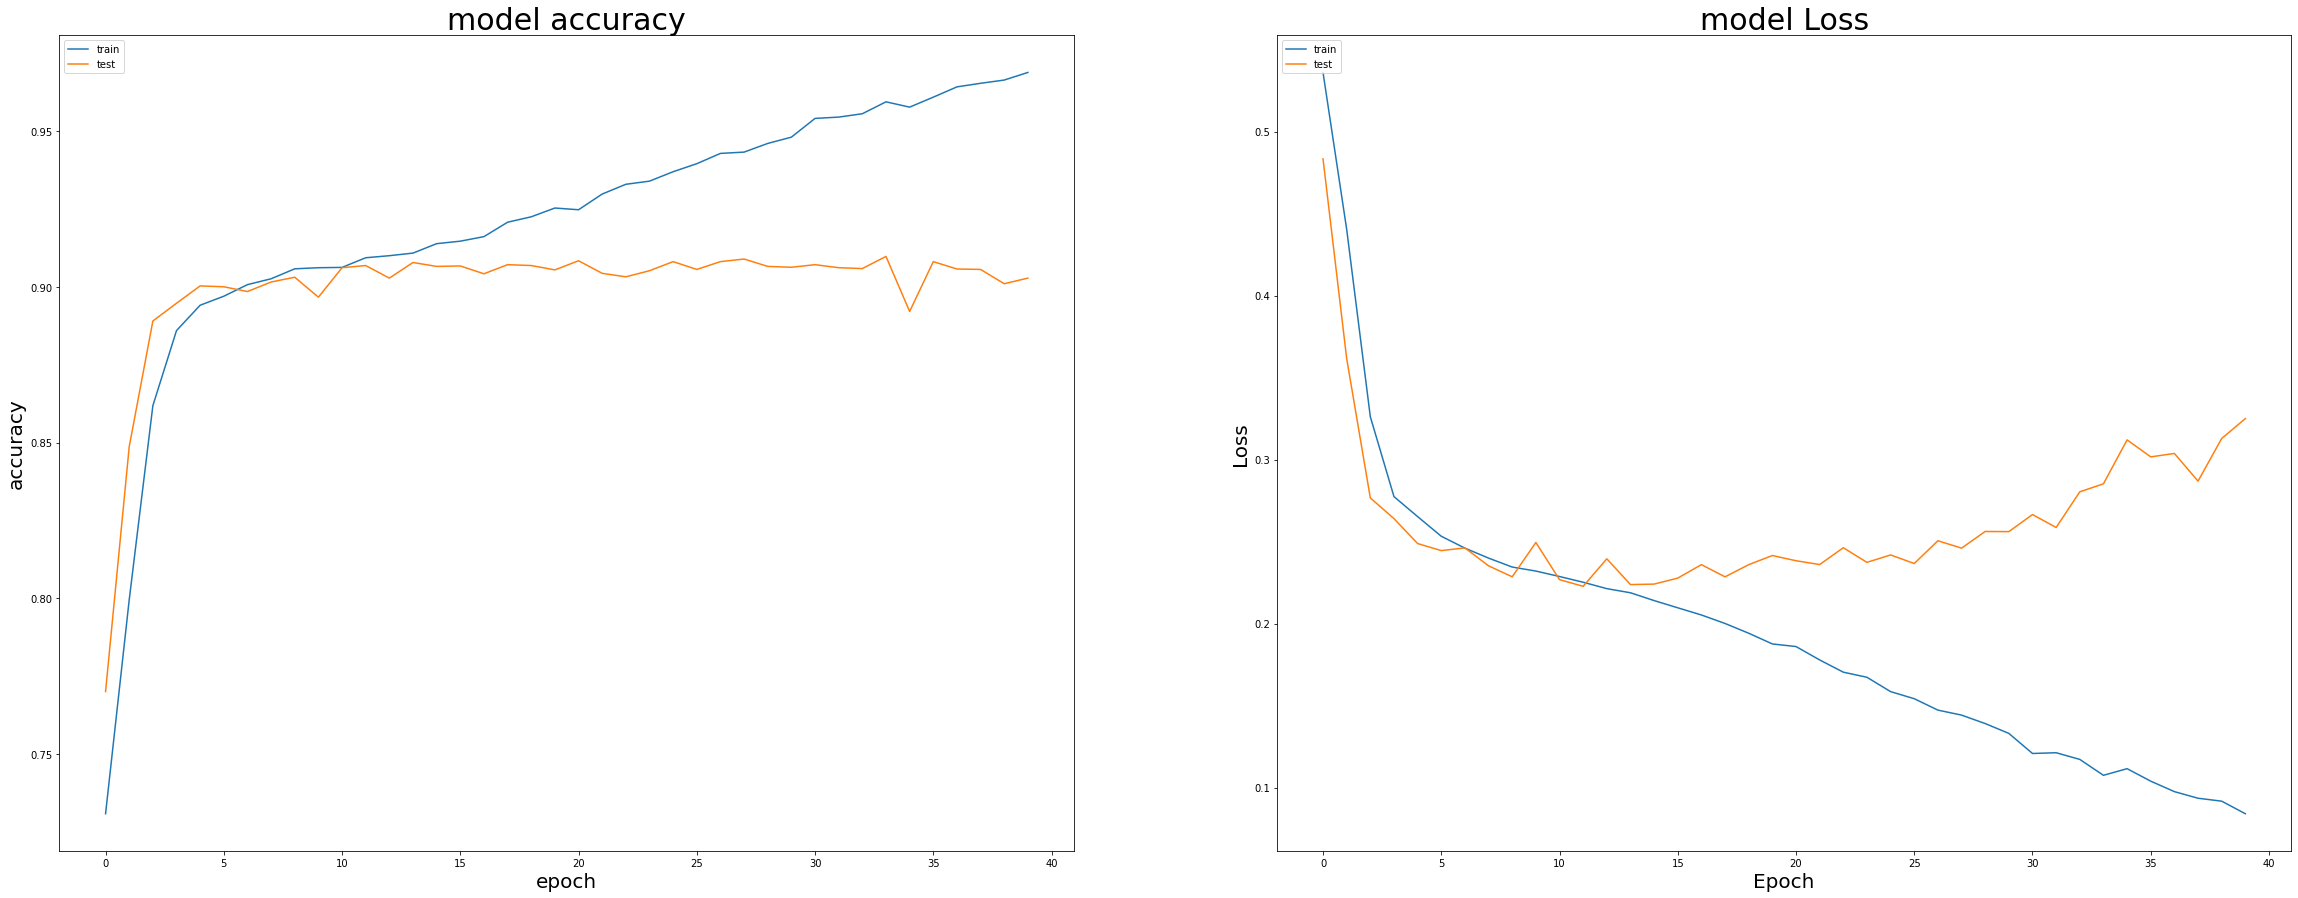

In [ ]:
grapPlotter.plot_train_history(w2v_embedding_lstm_title_model_history)

##### Com o modelo mais simples

In [ ]:
simple_dense_title_model = SimpleDense(TITLE_VEC_DIM).get_model()
simple_dense_title_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                1632      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:

simple_dense_title_model_history = simple_dense_title_model.fit(X_w2v_title_train, y_w2v_title_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1, random)

Epoch 1/40
898/898 [==============================] - 6s 5ms/step - loss: 221.9633 - accuracy: 0.4996 - val_loss: 149.5961 - val_accuracy: 0.5146
Epoch 2/40
898/898 [==============================] - 4s 4ms/step - loss: 181.3477 - accuracy: 0.5017 - val_loss: 156.9331 - val_accuracy: 0.4854
Epoch 3/40
898/898 [==============================] - 6s 7ms/step - loss: 151.3447 - accuracy: 0.5040 - val_loss: 198.0210 - val_accuracy: 0.4854
Epoch 4/40
898/898 [==============================] - 5s 5ms/step - loss: 124.8170 - accuracy: 0.5013 - val_loss: 188.5751 - val_accuracy: 0.5146
Epoch 5/40
898/898 [==============================] - 5s 6ms/step - loss: 109.3146 - accuracy: 0.5058 - val_loss: 168.4356 - val_accuracy: 0.4854
Epoch 6/40
898/898 [==============================] - 3s 3ms/step - loss: 95.1096 - accuracy: 0.5054 - val_loss: 85.1607 - val_accuracy: 0.4854
Epoch 7/40
898/898 [==============================] - 3s 3ms/step - loss: 75.6020 - accuracy: 0.5050 - val_loss: 76.3753 - val

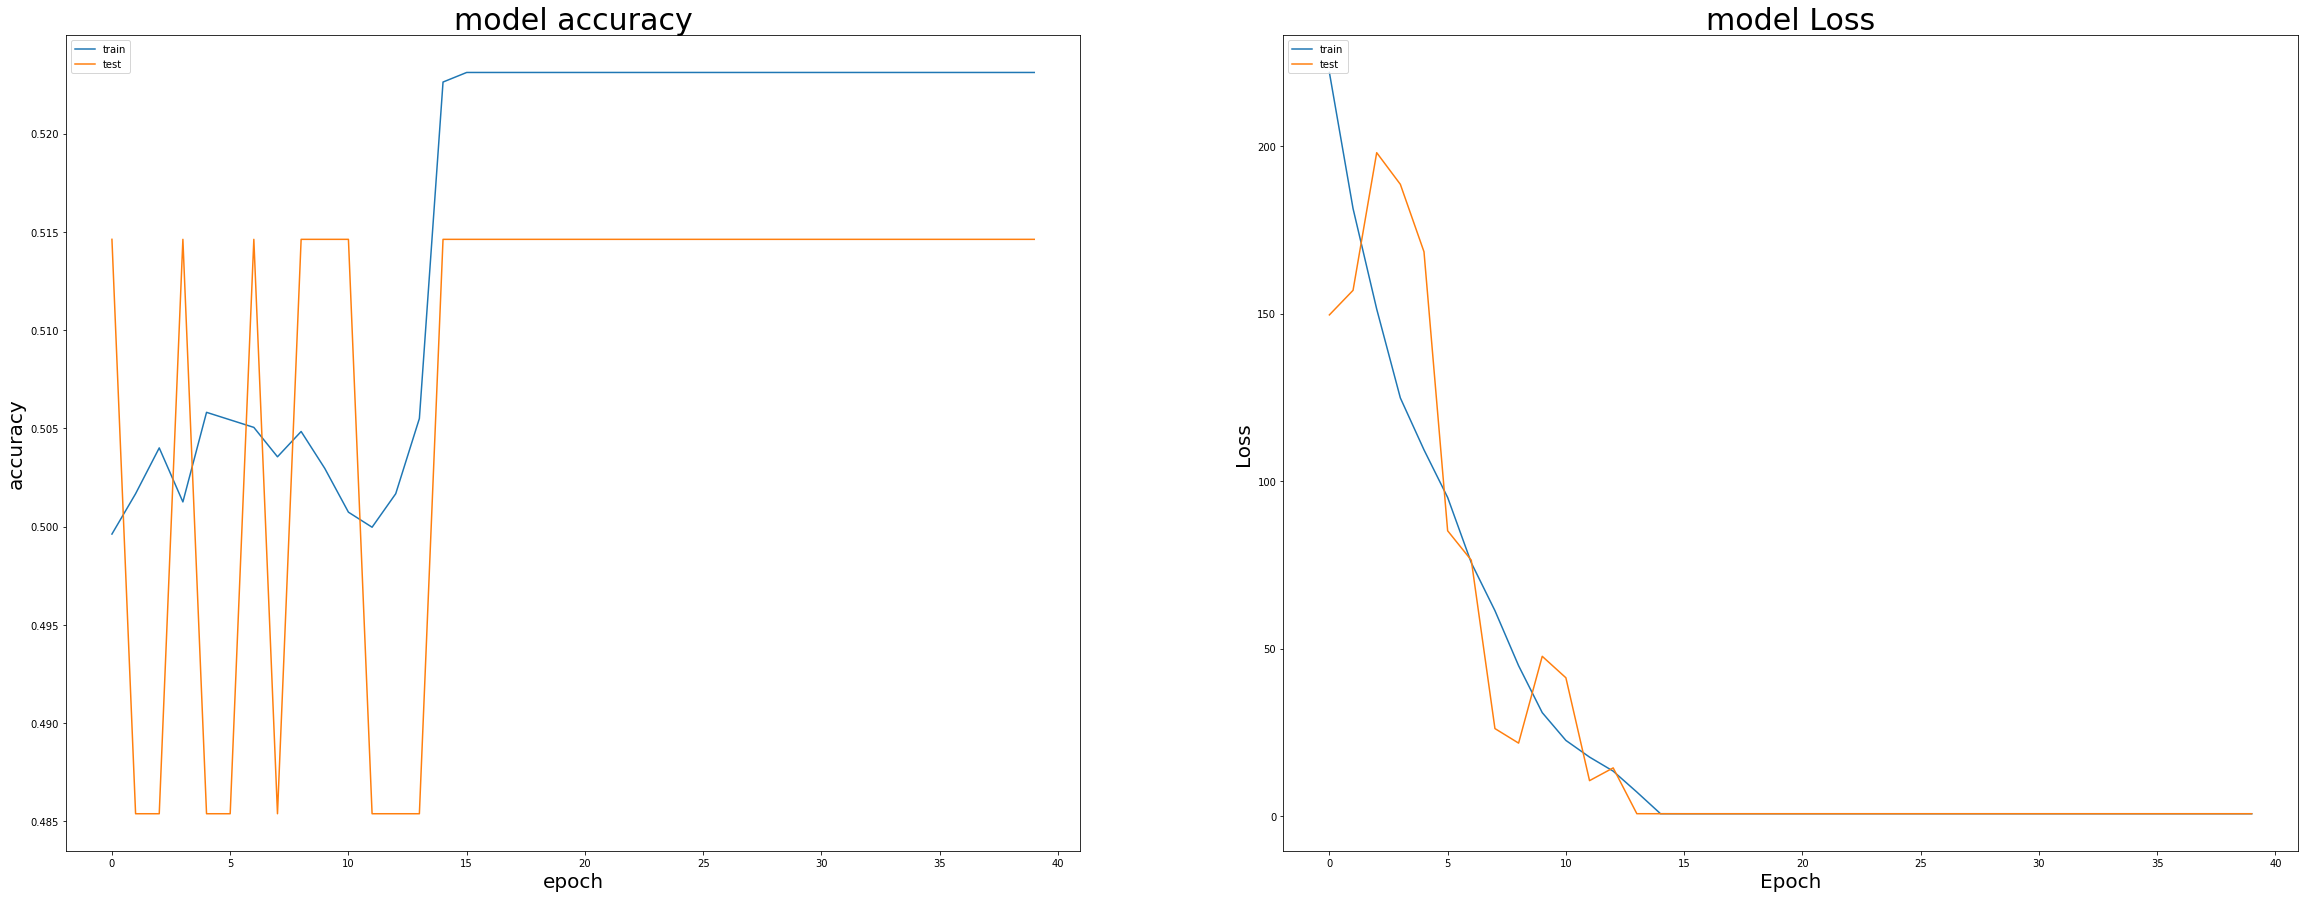

In [ ]:
grapPlotter.plot_train_history(simple_dense_title_model_history)